In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

from util import fdr

In [2]:
def load_data(file, num_features=81):
    df = pd.read_csv(file)
    std_scale = StandardScaler().fit(df)
    df_std = pd.DataFrame(std_scale.transform(df), columns=df.columns)

    with open('filter_rank.csv', 'r') as f:
        rank = f.read().split('\n')

    y = df['fraud_label'].to_numpy()
    df_std.drop(columns=['record', 'fraud_label'], inplace=True)

    ks_col = rank[:num_features]
    filter_df = df_std.filter(items=ks_col)
    return filter_df, y

In [4]:
df, y = load_data('vars_308.csv')

In [5]:
df.head()

,fulladdress_day_since,address_day_since,fulladdress_count_30,address_count_30,address_count_14,fulladdress_count_14,address_count_7,fulladdress_count_7,address_count_0_by_14,fulladdress_count_0_by_14,...,fulladdress_homephone_count_0_by_14,homephone_count_7,homephone_count_3,address_count_1_by_7,fulladdress_count_1_by_7,fulladdress_count_0,address_count_0,name_dob_count_3,ssn_count_3,homephone_count_14
0,0.402897,0.427984,-0.101958,-0.117706,-0.088541,-0.079045,-0.072633,-0.067095,0.148454,0.131798,...,0.120387,-0.769214,-0.521454,0.103441,0.09144,-0.041351,-0.042158,-0.046415,-0.047591,-1.011308
1,0.402897,0.427984,-0.101958,-0.117706,-0.088541,-0.079045,-0.072633,-0.067095,0.148454,0.131798,...,0.120387,-0.769214,-0.521454,0.103441,0.09144,-0.041351,-0.042158,-0.046415,-0.047591,-1.011308
2,0.402897,0.427984,-0.101958,-0.117706,-0.088541,-0.079045,-0.072633,-0.067095,0.148454,0.131798,...,0.120387,-0.769214,-0.521454,0.103441,0.09144,-0.041351,-0.042158,-0.046415,-0.047591,-1.011308
3,0.402897,0.427984,-0.101958,-0.117706,-0.088541,-0.079045,-0.072633,-0.067095,0.148454,0.131798,...,0.120387,-0.769214,-0.521454,0.103441,0.09144,-0.041351,-0.042158,-0.046415,-0.047591,-1.011308
4,0.402897,0.427984,-0.101958,-0.117706,-0.088541,-0.079045,-0.072633,-0.067095,0.148454,0.131798,...,0.120387,-0.769214,-0.521454,0.103441,0.09144,-0.041351,-0.042158,-0.046415,-0.047591,-1.011308


In [6]:
logit_select = RFECV(LogisticRegression(C=0.1,
                                        class_weight='balanced',
                                        max_iter=500),
                     step=1, cv=2, scoring=fdr, verbose=1, n_jobs=1)
logit_select = logit_select.fit(df, y)

Fitting estimator with 80 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 79 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 78 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 77 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 76 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 75 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 74 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 73 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 72 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 71 features.
Fitting estimator with 70 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 fe

/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 79 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 fe

/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

In [7]:
logit_select.grid_scores_

array([0.26318254, 0.38024541, 0.48280189, 0.4891253 , 0.507607  ,
       0.50656479, 0.50830177, 0.51226232, 0.51219285, 0.51128957,
       0.511498  , 0.51135904, 0.51504167, 0.51962691, 0.51816779,
       0.51927952, 0.51948797, 0.51948797, 0.51941849, 0.51941849,
       0.55040582, 0.5522816 , 0.55242056, 0.55262898, 0.55228161,
       0.5547134 , 0.55596392, 0.55596392, 0.55603339, 0.55610286,
       0.55603339, 0.55707549, 0.5566586 , 0.55686701, 0.55665859,
       0.55721446, 0.55756182, 0.55721446, 0.55728393, 0.55728393,
       0.557006  , 0.557006  , 0.55693652, 0.557006  , 0.55693652,
       0.55707546, 0.55707547, 0.55707547, 0.55707547, 0.55714495,
       0.55735338, 0.55735338, 0.55742286, 0.55728391, 0.55763132,
       0.55763132, 0.5574229 , 0.55735343, 0.55742292, 0.55735344,
       0.55749239, 0.55749239, 0.55749239, 0.55749239, 0.55749239,
       0.5572145 , 0.55735346, 0.55756192, 0.55749244, 0.55756192,
       0.55756191, 0.55749244, 0.55749244, 0.55749244, 0.55756

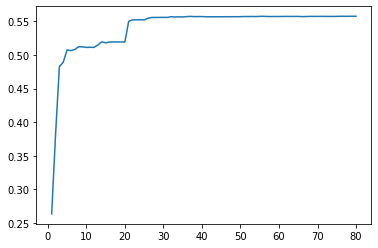

In [12]:
plt.figure()
plt.plot(range(1, len(logit_select.grid_scores_) + 1), logit_select.grid_scores_)
plt.show()

In [13]:
logit_scores = [[col, s] for col, s in zip(df.columns, logit_select.grid_scores_)]
logit_scores.sort(key=lambda x: x[1], reverse=True)
logit_scores = np.asarray(logit_scores)

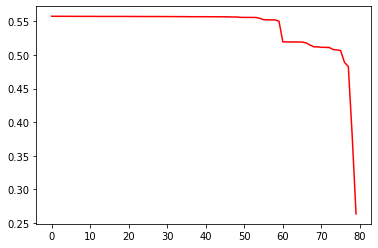

In [14]:
plt.figure()
scores = logit_select.grid_scores_
plt.plot(range(len(scores)), sorted(scores, reverse=True), 'r')
plt.show()

In [15]:
with open("wrapper_1.csv", 'w') as f:
    f.write('\n'.join([f'{col},{s}' for col, s in logit_scores]))

In [19]:
w1_df = df.filter(items=logit_scores[:30, :1].reshape(-1))
w1_df['fraud_label'] = y
w1_df.to_csv('var_30.csv', index=False)

In [21]:
w1_df = df.filter(items=logit_scores[:40, :1].reshape(-1))
w1_df['fraud_label'] = y
w1_df.to_csv('var_40.csv', index=False)

##### Run wrapper again with top 50 features
**Currently not used !**

In [19]:
wrap_1 = logit_scores[:50, :1].reshape(-1)
wrap_df = df.filter(items=wrap_1)

In [20]:
wrap_df.head()

,fulladdress_count_1_by_7,address_count_0,ssn_count_3,fulladdress_count_0,homephone_count_7,address_count_1_by_7,name_dob_count_3,name_count_7,homephone_count_3,fulladdress_homephone_count_0_by_14,...,ssn_count_0_by_30,ssn_name_count_30,ssn_name_day_since,address_count_0_by_3,fulladdress_count_0_by_3,ssn_name_dob_count_14,fulladdress_homephone_count_14,ssn_dob_count_0_by_30,name_dob_count_0_by_30,ssn_name_dob_count_30
0,0.09144,-0.042158,-0.047591,-0.041351,-0.769214,0.103441,-0.046415,-0.115648,-0.521454,0.120387,...,0.17291,-0.097773,0.389111,0.087425,0.079739,-0.068281,-0.070089,0.162987,0.163303,-0.092594
1,0.09144,-0.042158,-0.047591,-0.041351,-0.769214,0.103441,-0.046415,-0.115648,-0.521454,0.120387,...,0.17291,-0.097773,0.389111,0.087425,0.079739,-0.068281,-0.070089,0.162987,0.163303,-0.092594
2,0.09144,-0.042158,-0.047591,-0.041351,-0.769214,0.103441,-0.046415,-0.115648,-0.521454,0.120387,...,0.17291,-0.097773,0.389111,0.087425,0.079739,-0.068281,-0.070089,0.162987,0.163303,-0.092594
3,0.09144,-0.042158,-0.047591,-0.041351,-0.769214,0.103441,-0.046415,-0.115648,-0.521454,0.120387,...,0.17291,-0.097773,0.389111,0.087425,0.079739,-0.068281,-0.070089,0.162987,0.163303,-0.092594
4,0.09144,-0.042158,-0.047591,-0.041351,-0.769214,0.103441,-0.046415,-0.115648,-0.521454,0.120387,...,0.17291,-0.097773,0.389111,0.087425,0.079739,-0.068281,-0.070089,0.162987,0.163303,-0.092594


In [21]:
logit_select_2 = RFECV(LogisticRegression(C=0.1,
                                          class_weight='balanced',
                                          max_iter=1000),
                       step=1, cv=4, scoring=fdr, verbose=1, n_jobs=2)
logit_select_2 = logit_select_2.fit(wrap_df, y)

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.


In [22]:
logit_scores_2 = [[col, s] for col, s in zip(wrap_df.columns, logit_select_2.grid_scores_)]
logit_scores_2.sort(key=lambda x: x[1], reverse=True)
logit_scores_2 = np.asarray(logit_scores_2)

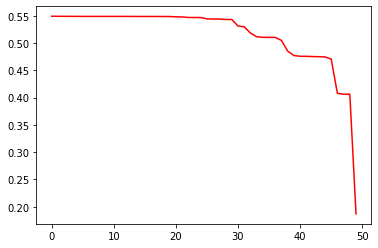

In [23]:
plt.figure()
scores = logit_select_2.grid_scores_
plt.plot(range(len(scores)), sorted(scores, reverse=True), 'r')
plt.show()

In [24]:
set(logit_scores[:30, :1].flat) - set(logit_scores_2[:30, :1].flat)

{'address_count_0',
 'address_count_1_by_7',
 'fulladdress_count_0',
 'fulladdress_count_1_by_7',
 'fulladdress_homephone_count_0_by_14',
 'fulladdress_homephone_count_7',
 'homephone_count_3',
 'homephone_count_7',
 'name_count_7',
 'name_dob_count_0_by_14',
 'name_dob_count_3',
 'name_dob_count_7',
 'ssn_count_0_by_14',
 'ssn_count_3',
 'ssn_dob_count_0_by_14',
 'ssn_firstname_count_0_by_14',
 'ssn_firstname_count_7',
 'ssn_lastname_count_0_by_14',
 'ssn_lastname_count_7',
 'ssn_name_dob_count_7'}

In [25]:
set(logit_scores_2[:30, :1].flat) - set(logit_scores[:30, :1].flat)

{'address_count_0_by_3',
 'address_count_1_by_14',
 'fulladdress_count_0_by_3',
 'fulladdress_count_1_by_30',
 'fulladdress_homephone_count_14',
 'fulladdress_homephone_count_30',
 'fulladdress_homephone_day_since',
 'name_count_30',
 'name_dob_count_0_by_30',
 'name_dob_count_14',
 'ssn_count_0_by_30',
 'ssn_count_14',
 'ssn_dob_count_0_by_30',
 'ssn_dob_count_14',
 'ssn_firstname_count_0_by_30',
 'ssn_lastname_count_0_by_30',
 'ssn_name_count_30',
 'ssn_name_day_since',
 'ssn_name_dob_count_14',
 'ssn_name_dob_count_30'}

In [26]:
with open("wrapper_2.csv", 'w') as f:
    f.write('\n'.join([f'{col},{s}' for col, s in logit_scores_2]))

In [27]:
w2_df = df.filter(items=logit_scores_2[:30, :1].reshape(-1))
w2_df['fraud_label'] = y
w2_df.to_csv('var_30_2.csv', index=False)

In [28]:
w2_df = df.filter(items=logit_scores_2[:40, :1].reshape(-1))
w2_df['fraud_label'] = y
w2_df.to_csv('var_40_2.csv', index=False)